In [1]:
import os
import pandas as pd

base_dir = "../../Data"
base_csv_path = os.path.join(base_dir, 'm1_post_feat_sel.csv')
assert os.path.exists(base_csv_path), f"base {base_csv_path} does not exist"

df = pd.read_csv(base_csv_path)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X = df.drop(['wl_time'], axis=1)
y = df['wl_time']

columns_to_scale = [col for col in df.columns if df[col].nunique() > 2]

scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [3]:
log = LogisticRegression(max_iter=1000)
f1_scores = cross_val_score(log, X, y, cv=5, scoring='f1').mean()
f1_macro_scores = cross_val_score(log, X, y, cv=5, scoring='f1_macro').mean()

print(f"F1 score post feature selection: {f1_scores}")
print(f"F1 macro score post feature selection: {f1_macro_scores}")

F1 score post feature selection: 0.7895104895104894
F1 macro score post feature selection: 0.8476561752423821


<AxesSubplot: >

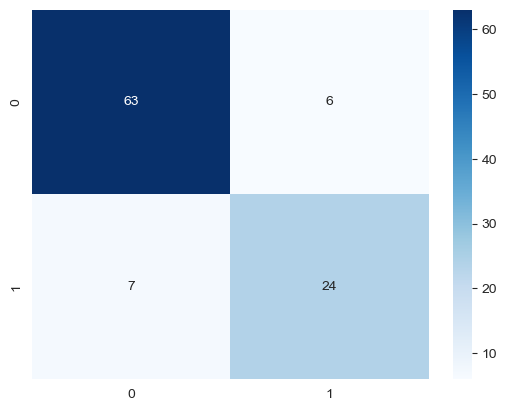

In [4]:
import seaborn as sns
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(log, X, y, cv=5)
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='Blues', fmt='g')